## Lesson 6

In [1]:
using LinearAlgebra, Statistics
using Distributions, Plots, QuadGK, Polynomials, Interpolations

### Exploring type trees

In [3]:
x = 1
y = Normal()
z = "foo"
@show x, y, z
@show typeof(x), typeof(y), typeof(z)
@show supertype(typeof(x));

(x, y, z) = (1, Normal{Float64}(μ=0.0, σ=1.0), "foo")
(typeof(x), typeof(y), typeof(z)) = (Int64, Normal{Float64}, String)
supertype(typeof(x)) = Signed


The pipe operator, `|>`, is is equivalent

In [4]:
@show typeof(x) |> supertype
@show supertype(typeof(x))    # same result as above
@show supertype(typeof(y))
@show typeof(z) |> supertype
@show typeof(x) <: Any;    # shows is `Signed` is in the family of `Any`

typeof(x) |> supertype = Signed
supertype(typeof(x)) = Signed
supertype(typeof(y)) = Distribution{Univariate, Continuous}
typeof(z) |> supertype = AbstractString
typeof(x) <: Any = true


#### More `typeof` and `supertype` functions 

In [5]:
using Base: show_supertypes

show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

In [6]:
subtypes(Integer)

3-element Vector{Any}:
 Bool
 Signed
 Unsigned

You can use the `subtypes` function to write an algorithim that shows the full family tree below a specific type `t`.

In [7]:
function subtypetree(t, level = 1, indent = 4)
    if level == 1
        println(t)
    end
    for s in subtypes(t)
        println(join(fill(" ", level * indent)) * string(s))    # print type
        subtypetree(s, level + 1, indent)    # recursively print the next type, indenting
    end
end

subtypetree (generic function with 3 methods)

In [8]:
subtypetree(Number)

Number
    Base.MultiplicativeInverses.MultiplicativeInverse
        Base.MultiplicativeInverses.SignedMultiplicativeInverse
        Base.MultiplicativeInverses.UnsignedMultiplicativeInverse
    Complex
    DualNumbers.Dual
    Plots.Measurement
    Real
        AbstractFloat
            BigFloat
            Float16
            Float32
            Float64
        AbstractIrrational
            Irrational
            IrrationalConstants.IrrationalConstant
                IrrationalConstants.Fourinvπ
                IrrationalConstants.Fourπ
                IrrationalConstants.Halfπ
                IrrationalConstants.Inv2π
                IrrationalConstants.Inv4π
                IrrationalConstants.Invsqrt2
                IrrationalConstants.Invsqrt2π
                IrrationalConstants.Invsqrtπ
                IrrationalConstants.Invπ
                IrrationalConstants.Log2π
                IrrationalConstants.Log4π
                IrrationalConstants.Loghalf
                Irratio

The root of all types is `Any` (you wouldn't want to use `subtypetree` on `Any`.

Making a custom type

In [9]:
struct MyType
    a::Float64
end

myval = MyType(2.0)
@show myval
@show typeof(myval)
@show supertype(typeof(myval))
@show typeof(myval) <: Any;

myval = MyType(2.0)
typeof(myval) = MyType
supertype(typeof(myval)) = Any
typeof(myval) <: Any = true


In [10]:
x = [1, 2]
show(x)

[1, 2]

In [11]:
myval = MyType(2.0)

MyType(2.0)

In [12]:
show(myval)

MyType(2.0)

Fallback implementation

In [14]:
import Base.show

function show(io::IO, x::MyType)
    str = "(MyType.a = $(x.a))"    # custom display
    print(io, str)
end
show(myval)

(MyType.a = 2.0)

## Distributions

In [16]:
using Distributions
d1 = Normal(1.0, 2.0)    # an example type to explore
@show d1
show_supertypes(typeof(d1))

d1 = Normal{Float64}(μ=1.0, σ=2.0)
Normal{Float64} <: Distribution{Univariate, Continuous} <: Sampleable{Univariate, Continuous} <: Any

In [17]:
@show rand(d1);

rand(d1) = 1.1178132184729208


In [18]:
function simulateprocess(x_0; a = 1.0, b = 1.0, N = 5, d::Sampleable{Univariate, Continuous})
        x = zeros(typeof(x_0), N + 1)    # prelocate vector, careful on the type
        x[1] = x_0
        for t in 2:(N + 1)
            x[t] = a * x[t - 1] + b * rand(d)    # draw
        end
        return x
    end
    @show simulateprocess(0.0, d = Normal(0.2, 2.0));
    

simulateprocess(0.0, d = Normal(0.2, 2.0)) = [0.0, 1.689889141037019, 0.5307315106420785, -3.6790641355169003, -2.2705120025666163, -2.2328914809131395]


The `Distributions{Univariate, Continuous}` abstract type has other functions we can use for generic algorithims operating on distributions.

For example,
`pdf`, `cdf`, `quantile`, `support`, `minimum`, `maximum`

In [19]:
d1 = Normal(1.0, 2.0)
d2 = Exponential(0.1)

@show d1
@show d2
@show supertype(typeof(d1))
@show supertype(typeof(d2))
@show pdf(d1, 0.1)
@show pdf(d2, 0.1)
@show cdf(d1, 0.1)
@show cdf(d2, 0.1)
@show support(d1)
@show support(d2)
@show minimum(d1)
@show minimum(d2)
@show maximum(d1)
@show maximum(d2);

d1 = Normal{Float64}(μ=1.0, σ=2.0)
d2 = Exponential{Float64}(θ=0.1)
supertype(typeof(d1)) = Distribution{Univariate, Continuous}
supertype(typeof(d2)) = Distribution{Univariate, Continuous}
pdf(d1, 0.1) = 0.18026348123082397
pdf(d2, 0.1) = 3.6787944117144233
cdf(d1, 0.1) = 0.32635522028792
cdf(d2, 0.1) = 0.6321205588285577
support(d1) = RealInterval{Float64}(-Inf, Inf)
support(d2) = RealInterval{Float64}(0.0, Inf)
minimum(d1) = -Inf
minimum(d2) = 0.0
maximum(d1) = Inf
maximum(d2) = Inf


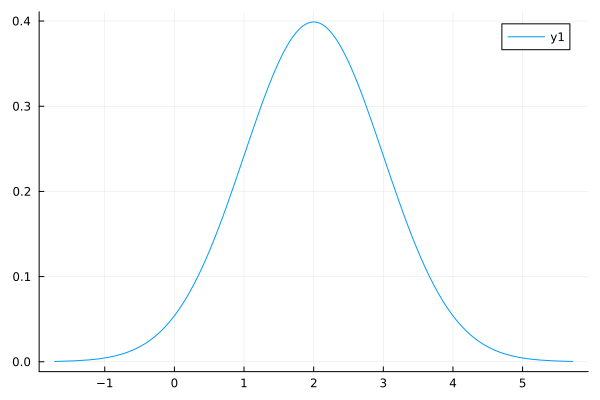

In [20]:
using StatsPlots
d = Normal(2.0, 1.0)
plot(d)    # no other arguments

Calling `plot` on any subtype of `Distribuytions{Univariate, Continuous}` displays the pdf and uses the `maximum` and the `minimum` to define the range.

In [21]:
struct OurTruncatedExponential <: Distribution{Univariate, Continuous}
    alpha::Float64
    xmax::Float64
end

function Distributions.pdf(d::OurTruncatedExponential, x::Real)
    d.alpha * exp(-d.alpha * x) / exp(-d.alpha * d.xmax)
end

Distributions.minimum(d::OurTruncatedExponential) = 0
Distributions.maximum(d::OurTruncatedExponential) = d.xmax


In [22]:
d = OurTruncatedExponential(1.0, 2.0)

OurTruncatedExponential(alpha=1.0, xmax=2.0)

In [23]:
@show minimum(d), maximum(d)

(minimum(d), maximum(d)) = (0, 2.0)


(0, 2.0)

In [26]:
@show support(d)

support(d) = RealInterval{Float64}(0.0, 2.0)


RealInterval{Float64}(0.0, 2.0)

In [27]:
Distributions.support(d::Distribution) = RealInterval(minimum(d), maximum(d))

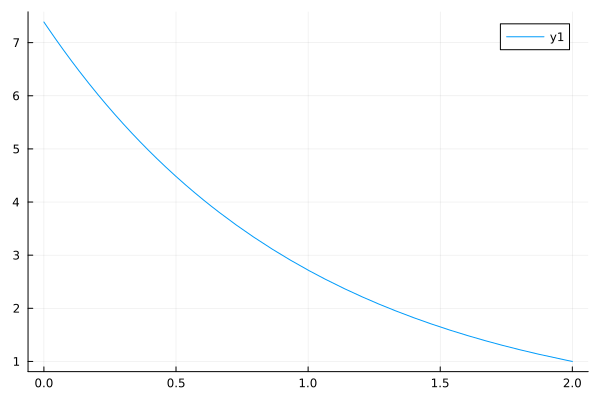

In [28]:
plot(d)

typeof(d) = Truncated{Exponential{Float64}, Continuous, Float64, Float64, Float64}


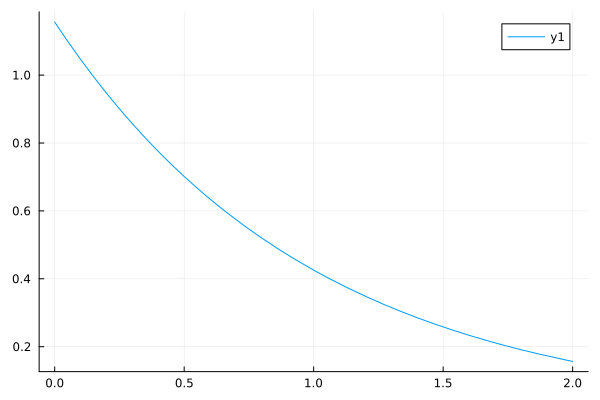

In [30]:
d = Truncated(Exponential(1.0), 0.0, 2.0)
@show typeof(d)
plot(d)

## 6.4. Numbers and algrbraic structures

In [31]:
a = 1.0 + 1.0im
b = 0.0 + 2.0im
@show typeof(a)
@show typeof(b)
@show a + b
@show a * b
@show -a
@show a - b
@show zero(a)
@show one(a);

typeof(a) = ComplexF64
typeof(b) = ComplexF64
a + b = 1.0 + 3.0im
a * b = -2.0 + 2.0im
-a = -1.0 - 1.0im
a - b = 1.0 - 1.0im
zero(a) = 0.0 + 0.0im
one(a) = 1.0 + 0.0im


In [32]:
## Just a little reminder
@show x = 1.0
@show typeof(x)
@show supertype(typeof(x))
@show show_supertypes(Int64)
;

x = 1.0 = 1.0
typeof(x) = Float64
supertype(typeof(x)) = AbstractFloat
Int64 <: Signed <: Integer <: Real <: Number <: Anyshow_supertypes(Int64) = nothing


In [33]:
@show a = BigInt(10)
@show typeof(a)
@show typeof(a) <: Integer
;

a = BigInt(10) = 10
typeof(a) = BigInt
typeof(a) <: Integer = true


### 6.4.1 Complex numbers and compostition of generic functions

In [35]:
x = 4.0 + 1.0im
@show x, typeof(x)
xbig = BigFloat(4.0) + 1.0im
@show xbig, typeof(xbig)
;

(x, typeof(x)) = (4.0 + 1.0im, ComplexF64)
(xbig, typeof(xbig)) = (4.0 + 1.0im, Complex{BigFloat})


In [36]:
@which +(x, x)

+(z::Complex, w::Complex)
     @ Base complex.jl:294

In [37]:
@which abs(x)

abs(z::Complex)
     @ Base complex.jl:283

In [38]:
import Base.abs
abs(z::Complex) = hypot(real(z), imag(z))

abs (generic function with 17 methods)

In [39]:
@which abs(1.0)

abs(x::Union{Float16, Float32, Float64})
     @ Base float.jl:610

In [40]:
@which abs(BigFloat(1.0))

abs(x::Real)
     @ Base number.jl:164

In [41]:
abs(x::Real) = ifelse(signbit(x), -x, x)
abs(x::Float64) = abs_float(x)

abs (generic function with 18 methods)

## 6.5 Reals and Algebraic Structures

In [42]:
a = 1//10
b = 4//6
@show typeof(a)
@show typeof(a) <: Number
@show typeof(a) <: Real
@show inv(a)
@show a / b 
@show a < b;

typeof(a) = Rational{Int64}
typeof(a) <: Number = true
typeof(a) <: Real = true
inv(a) = 10//1
a / b = 3//20
a < b = true


In [43]:
@show Float64 <: AbstractFloat
@show BigFloat <: AbstractFloat
@show eps(Float64)
@show eps(BigFloat);

Float64 <: AbstractFloat = true
BigFloat <: AbstractFloat = true
eps(Float64) = 2.220446049250313e-16
eps(BigFloat) = 1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77


In [101]:
@which isless(1,2)

isless(x::Real, y::Real)
     @ Base operators.jl:430

## 6.6. Functions and function-like type

Another common example of the separation between data structures and algorithms is the use of functions.

In [53]:
@which abs(x)
abs(z::Complex)  = hypot(real(z), imag(z))
@which abs(1.0)
abs(x::Real) = ifelse(signbit(x), -x, x)
abs(x::Float64) = abs_float(x)

abs (generic function with 18 methods)